<a href="https://colab.research.google.com/github/jjlee6496/one-by-one/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/test_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제1 : 주택 가격으로부터 범죄율을 예측하는 모델을 만들고, 예측 결과의 상관계수를 계산하시오

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore') 

boston =  load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target

(0.42300001056873704, 5.664070964208682e-08)


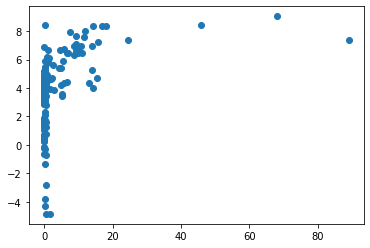

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats

Y = boston_df['CRIM']
X = boston_df[['PRICE']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)

plt.scatter(Y_test, Y_predict)
print(stats.pearsonr(Y_test, Y_predict))

상관계수가 0.4로 약간의 선형관계가 있다.

# 과제2 : horsepower를 1/10 로 줄이고, 회귀계수가 어떻게 변하는지 본다.

In [40]:
import numpy as np
import pandas as pd 

data_df = pd.read_csv('auto-mpg.csv', header=0, engine='python')
data_df = data_df.drop(['car_name', 'origin'], axis=1, inplace=False)
data_df.horsepower=data_df.horsepower.replace('?', np.NaN)
data_df=data_df.dropna()
data_df.horsepower= data_df.horsepower.astype('int')
data_df2 = data_df.copy()
data_df2.horsepower=data_df2.horsepower*0.1

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 원래 회귀계수
Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)

coef = pd.Series(data=np.round(lr.coef_, 3), index=X.columns)
coef


cylinders      -0.024
displacement    0.009
horsepower     -0.019
weight         -0.007
acceleration    0.009
model_year      0.759
dtype: float64

In [47]:
# 1/10 후 회귀계수
Y2 = data_df2['mpg']
X2 = data_df2.drop(['mpg'], axis=1, inplace=False)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=156)

lr2 = LinearRegression()
lr2.fit(X_train2, Y_train2)
Y_predict = lr2.predict(X_test2)

coef2 = pd.Series(data=np.round(lr2.coef_, 3), index=X.columns)
coef2

cylinders      -0.024
displacement    0.009
horsepower     -0.189
weight         -0.007
acceleration    0.009
model_year      0.759
dtype: float64

회귀계수 값이 -0.019에서 -0.189으로 절댓값이 10배 커졌다